In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('titanic_final')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


In [12]:
df['Embarked'].nunique()

3

In [13]:
X_nonstr_target = df.drop(['Survived', 'Age', 'Embarked'], axis = 1)

In [14]:
y = df['Survived']

In [15]:
X_nonstr_target

,PassengerId,Pclass,Sex,SibSp,Parch,Fare
0,1,3,male,1,0,7.2500
1,2,1,female,1,0,71.2833
2,3,3,female,0,0,7.9250
3,4,1,female,1,0,53.1000
4,5,3,male,0,0,8.0500
...,...,...,...,...,...,...
884,887,2,male,0,0,13.0000
885,888,1,female,0,0,30.0000
886,889,3,female,1,2,23.4500
887,890,1,male,0,0,30.0000


In [16]:
X_str = pd.get_dummies(df[['Age', 'Embarked']], drop_first = True)

In [17]:
X = pd.concat([X_str, X_nonstr_target], axis = 1)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          889 non-null    float64
 1   Embarked_Q   889 non-null    uint8  
 2   Embarked_S   889 non-null    uint8  
 3   PassengerId  889 non-null    int64  
 4   Pclass       889 non-null    int64  
 5   Sex          889 non-null    object 
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
dtypes: float64(2), int64(4), object(1), uint8(2)
memory usage: 50.5+ KB


In [19]:
def change(s):
    if s=='male':
        s = 1
    else:
        s = 0
    return s

In [20]:
X['Sex'] = X['Sex'].apply(change)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          889 non-null    float64
 1   Embarked_Q   889 non-null    uint8  
 2   Embarked_S   889 non-null    uint8  
 3   PassengerId  889 non-null    int64  
 4   Pclass       889 non-null    int64  
 5   Sex          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
dtypes: float64(2), int64(5), uint8(2)
memory usage: 50.5 KB


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)

In [29]:
X_test = scaler.transform(X_test)

In [30]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [31]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [32]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [33]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [34]:
grid_model.best_params_

{'C': 21.544346900318832, 'penalty': 'l1'}

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [36]:
y_pred = grid_model.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred)

0.8033707865168539

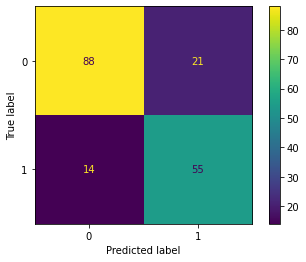

In [38]:
plot_confusion_matrix(grid_model,X_test,y_test)

In [39]:
model = LogisticRegression()

In [40]:
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', solver='saga')

In [42]:
pred = log_model.predict(X_test)

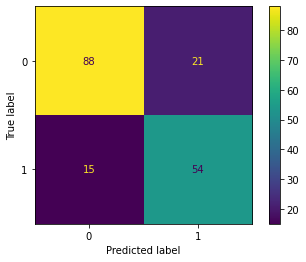

In [43]:
plot_confusion_matrix(model,X_test,y_test)

In [44]:
accuracy_score(y_test,pred)

0.797752808988764

In [45]:
pred_or = model.predict(X_train)

In [46]:
X_train.shape

(711, 9)

In [47]:
accuracy_score(y_train,pred_or)

0.8059071729957806

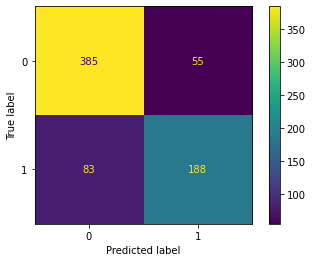

In [48]:
plot_confusion_matrix(model,X_train,y_train)

In [49]:
test = pd.read_csv('test_final.csv')

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  419 non-null    int64  
 1   Pclass       419 non-null    int64  
 2   Sex          419 non-null    int64  
 3   Age          419 non-null    float64
 4   SibSp        419 non-null    int64  
 5   Parch        419 non-null    int64  
 6   Fare         418 non-null    float64
 7   Q            419 non-null    int64  
 8   S            419 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.6 KB


In [51]:
test = test.fillna(test['Fare'].mean())